# Exploratory Data Analysis (EDA)

## Objective
The goal of this EDA is to analyze the provided eCommerce dataset to uncover key insights about customers, products, and transactions. These insights will help improve business strategies and identify trends in sales and customer behavior.

## Dataset Overview
The dataset includes three files:
- **Customers.csv**: Customer profiles.
- **Products.csv**: Product details.
- **Transactions.csv**: Purchase records.

## Key Questions Explored
1. What are the most popular products?
2. Which regions contribute the most to sales?
3. What are the sales trends over time?
4. How are customers distributed across regions?
5. What is the price distribution of products?


In [1]:
import pandas as pd

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [4]:
# Check basic info and null values
print("Dataset Information:")
print("Customers Info:")
print(customers.info(), "\n")
print("Products Info:")
print(products.info(), "\n")
print("Transactions Info:")
print(transactions.info(), "\n")

Dataset Information:
Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Co

In [5]:
# Checking for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions:")
print(transactions.isnull().sum(), "\n")

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [6]:
# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [7]:
# Checking for duplicates
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [8]:
# Summary of data after preprocessing
print("\nCustomers Summary:")
print(customers.describe(include='all'), "\n")

print("Products Summary:")
print(products.describe(include='all'), "\n")

print("Transactions Summary:")
print(transactions.describe(include='all'), "\n")


Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00 

Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66       

## *a. Top-Selling Products*

In [9]:
# Merge transactions with product details
transactions_products = transactions.merge(products, on='ProductID')

# Group by product and calculate total quantity sold
top_products = transactions_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

print("Top-Selling Products:")
print(top_products.head(10))  # Display top 10 products


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


## *b. Sales by Region*

In [10]:
# Merge transactions with customer details
transactions_customers = transactions.merge(customers, on='CustomerID')

# Group by region and calculate total sales
sales_by_region = transactions_customers.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

print("Sales by Region:")
print(sales_by_region)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


## *c. Transaction Trends Over Time*

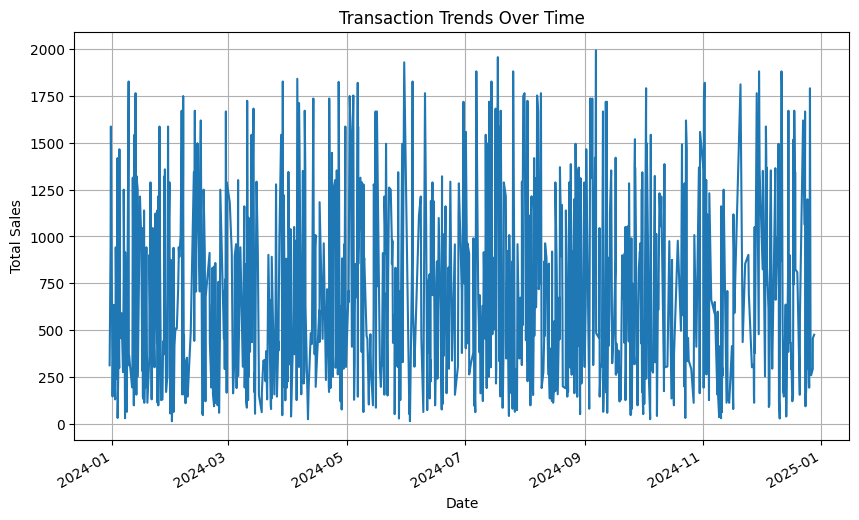

In [12]:
# Group transactions by date and calculate total sales
sales_trend = transactions.groupby('TransactionDate')['TotalValue'].sum()

# Plot sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sales_trend.plot(title='Transaction Trends Over Time', xlabel='Date', ylabel='Total Sales')
plt.grid()
plt.show()


## *d. Customer Distribution Across Regions*

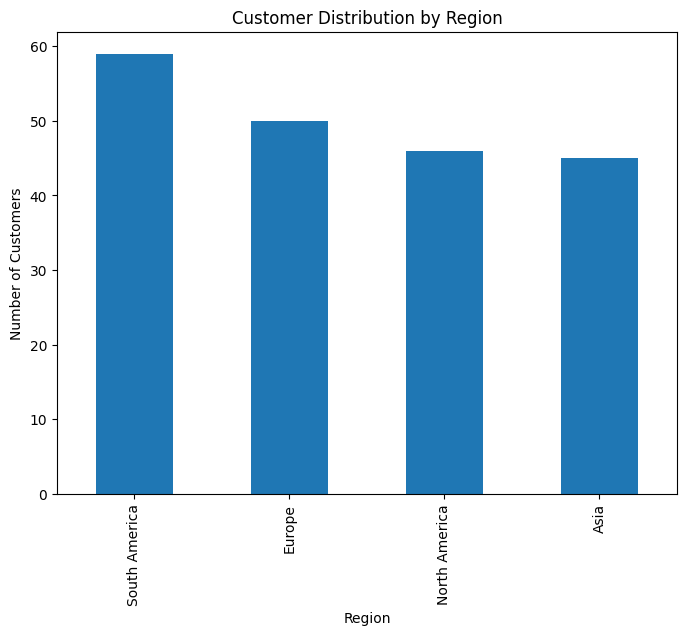

In [13]:
# Count customers by region
customers_by_region = customers['Region'].value_counts()

# Plot customer distribution
customers_by_region.plot(kind='bar', title='Customer Distribution by Region', xlabel='Region', ylabel='Number of Customers', figsize=(8, 6))
plt.show()


## *e. Product Price Ranges*

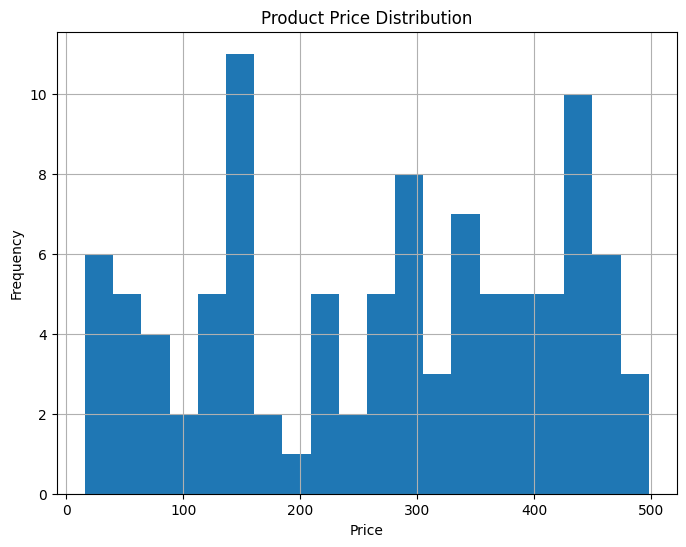

In [14]:
# Plot a histogram of product prices
products['Price'].plot(kind='hist', bins=20, title='Product Price Distribution', figsize=(8, 6))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()


## Conclusion for EDA

The exploratory data analysis provided the following key insights into the eCommerce dataset:

1. **Top-Selling Products**:
   - The **ActiveWear Smartwatch** is the most popular product, followed by **SoundWave Headphones** and **HomeSense Desk Lamp**.
   - Products in the **ActiveWear** and **SoundWave** categories dominate sales, highlighting their strong customer demand.

2. **Sales by Region**:
   - **South America** is the leading region in terms of total sales, followed by **Europe** and **North America**.
   - Targeted marketing and enhanced distribution in South America could further boost sales performance.

3. **Sales Trends Over Time**:
   - Transaction values exhibit periodic spikes, indicating seasonality or promotional campaigns.
   - Specific dates with unusually high sales should be analyzed further for replicable strategies.

4. **Customer Distribution**:
   - The majority of customers are concentrated in **South America**, supporting its high revenue contribution.
   - Focused efforts to retain and grow this customer base could enhance long-term profitability.

5. **Product Pricing**:
   - Product prices are distributed widely, with notable clusters around $100, $200, and $400.
   - Mid-range and premium pricing strategies align well with customer purchasing behaviors.

### Final Insight
These findings can guide business strategies by focusing on popular product categories, optimizing regional sales strategies, and leveraging insights from customer purchasing patterns.
